# Assignment 3 - Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npz` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making 2D pcolormesh plots
- Making scatterplots
- Annotating plots with titles and axes

## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display 

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [3]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes. Provide axis labels for all of your plots in this assignment.

In [4]:
%matplotlib inline

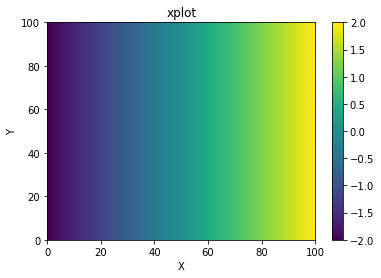

In [8]:
plt.pcolormesh(xx);
plt.title("xplot")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();

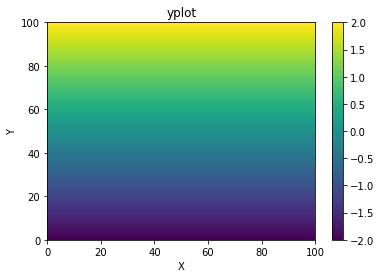

In [7]:
plt.pcolormesh(yy);
plt.title("yplot")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar();

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [9]:
import math
r = (xx**2 + yy**2)**(1/2)
phi = np.arctan2(yy,xx)

### 1.4. Visualize $r$ and $\varphi$ as functions of $x$ and $y$

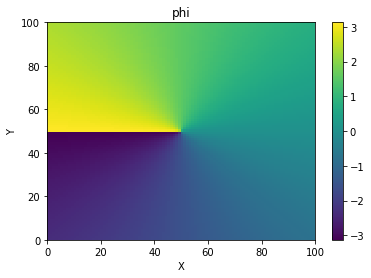

In [10]:
%matplotlib inline
plt.pcolormesh(phi, shading="auto");
plt.xlabel('X')
plt.ylabel('Y')
plt.title('phi')
plt.colorbar();

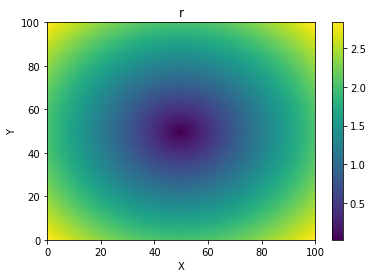

In [11]:
plt.pcolormesh(r, shading="auto");
plt.xlabel('X')
plt.ylabel('Y')
plt.title('r')
plt.colorbar();

### 1.5 Define the function $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it as a function of $x$ and $y$

In [12]:
f = np.cos(4*r)**2 + np.sin(4*phi)**2

In [14]:
%matplotlib inline

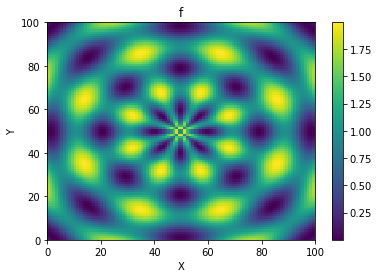

In [15]:
plt.pcolormesh(f, shading = 'auto');
plt.xlabel('X')
plt.ylabel('Y')
plt.title('f')
plt.colorbar();

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

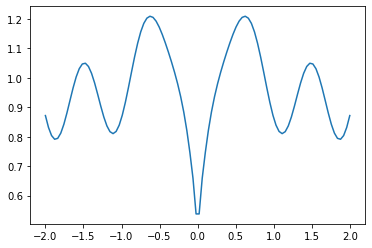

In [16]:
X_mean = f.mean(axis=1)
plt.plot(x, X_mean);

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

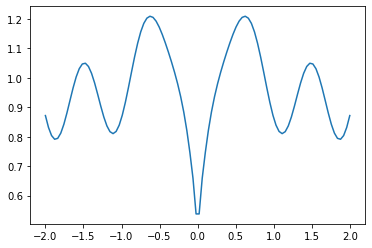

In [17]:
Y_mean = f.mean(axis=0)
plt.plot(y, Y_mean);

### 1.8 Plot the mean of $f$ with respect to $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

In [ ]:
#use mask to mask all values outside of ring, avg values outside ring 

In [55]:
f_mask = np.ma.masked_array(f, mask = mask)

In [56]:
f_mask.mean()

0.9355216832573694

In [140]:
nrings = 1000
rings = np.linspace(-10000, 4, nrings)

for i in range (nrings-1):
    mask = np.invert((r>rings[i]) & (r<rings[i+1]))

In [141]:
f_mask = np.ma.masked_array(f, mask=mask)

In [142]:
f_mask.mean()

0.9557911305208129

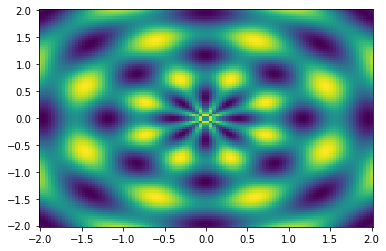

In [143]:
plt.pcolormesh(x,y,f_mask, shading = "auto")

## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu/About_Argo.html) Data

In this problem, we use real data from ocean profiling floats.

### 2.1 Use the shell command `wget` to download an example ARGO float profile from the North Atlantic.
The data file's url is http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

In [55]:
!wget http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz

--2020-09-24 16:15:08--  http://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz [following]
--2020-09-24 16:15:08--  https://www.ldeo.columbia.edu/~rpa/argo_float_4901412.npz
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144032 (141K)
Saving to: ‘argo_float_4901412.npz.1’

argo_float_4901412. 100%[===================>] 140.66K  --.-KB/s    in 0.1s    

2020-09-24 16:15:08 (1.14 MB/s) - ‘argo_float_4901412.npz.1’ saved [144032/144032]



### 2.2 Load the data file

In [56]:
argo = np.load('argo_float_4901412.npz')
argo

### 2.3 Extract the temperature, pressure and salinity arrays to arrays T, S, P and masking out invalid data (the nan values from missing points).

In [57]:
list(argo.keys())

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

In [58]:
T = np.ma.masked_invalid(argo['T'])
S = np.ma.masked_invalid(argo['S'])
P = np.ma.masked_invalid(argo['P'])

In [59]:
date = argo['date']
lat = argo['lat']
lon = argo['lon']
levels = argo['levels']

### 2.4 Extract the date, lat, lon, and level arrays. 


In [60]:
date

array(['2012-07-13T22:33:06.019200000', '2012-07-23T22:54:59.990400000',
       '2012-08-02T22:55:52.003200000', '2012-08-12T23:08:59.971200000',
       '2012-08-22T23:29:01.968000000', '2012-09-01T23:17:38.976000000',
       '2012-09-12T02:59:18.960000000', '2012-09-21T23:18:37.036800000',
       '2012-10-02T03:00:17.971200000', '2012-10-11T23:13:27.984000000',
       '2012-10-22T02:50:32.006400000', '2012-10-31T23:36:39.974400000',
       '2012-11-11T02:40:46.041600000', '2012-11-20T23:08:29.990400000',
       '2012-12-01T02:47:51.993600000', '2012-12-10T23:23:16.972800000',
       '2012-12-21T02:58:48.979200000', '2012-12-30T23:07:23.030400000',
       '2013-01-10T02:56:43.008000000', '2013-01-19T23:24:26.956800000',
       '2013-01-30T02:43:53.011200000', '2013-02-08T23:15:27.043200000',
       '2013-02-19T01:12:50.976000000', '2013-02-28T23:07:13.008000000',
       '2013-03-11T02:43:30.979200000', '2013-03-20T23:17:22.992000000',
       '2013-03-31T01:50:38.025600000', '2013-04-09

In [61]:
lat

array([47.187, 46.716, 46.45 , 46.23 , 45.459, 44.833, 44.452, 44.839,
       44.956, 44.676, 44.13 , 43.644, 43.067, 42.662, 42.513, 42.454,
       42.396, 42.256, 42.089, 41.944, 41.712, 41.571, 41.596, 41.581,
       41.351, 41.032, 40.912, 40.792, 40.495, 40.383, 40.478, 40.672,
       41.032, 40.864, 40.651, 40.425, 40.228, 40.197, 40.483, 40.311,
       40.457, 40.463, 40.164, 40.047, 39.963, 40.122, 40.57 , 40.476,
       40.527, 40.589, 40.749, 40.993, 41.162, 41.237, 41.448, 41.65 ,
       42.053, 42.311, 42.096, 41.683, 41.661, 41.676, 42.018, 42.395,
       42.532, 42.558, 42.504, 42.63 , 42.934, 42.952, 42.777, 42.722,
       42.601, 42.457, 42.379])

In [62]:
lon

array([-39.13 , -37.282, -36.9  , -36.89 , -37.053, -36.658, -35.963,
       -35.184, -34.462, -33.784, -32.972, -32.546, -32.428, -32.292,
       -32.169, -31.998, -31.824, -31.624, -31.433, -31.312, -31.107,
       -31.147, -31.044, -31.14 , -31.417, -31.882, -32.145, -32.487,
       -32.537, -32.334, -32.042, -31.892, -31.861, -31.991, -31.883,
       -31.89 , -31.941, -31.889, -31.724, -31.412, -31.786, -31.561,
       -31.732, -31.553, -31.862, -32.389, -32.318, -32.19 , -32.224,
       -32.368, -32.306, -32.305, -32.65 , -33.093, -33.263, -33.199,
       -33.27 , -33.237, -33.221, -33.011, -32.844, -32.981, -32.784,
       -32.607, -32.87 , -33.196, -33.524, -33.956, -33.944, -33.71 ,
       -33.621, -33.552, -33.828, -34.11 , -34.38 ])

In [63]:
levels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

### 2.5 Note the shapes of T, S and P compared to these arrays. How do they line up?

In [69]:
T.shape

(78, 75)

In [68]:
S.shape

(78, 75)

In [67]:
P.shape

(78, 75)

In [ ]:
#They line up the same

### 2.6 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Flip the veritcal axis direction so that levels increase downward on the plot. Each plot should have a line for each column of data. It will look messy.  Make sure you label the axes and put a title on each plot.

Text(0.5, 1.0, 'T-L')

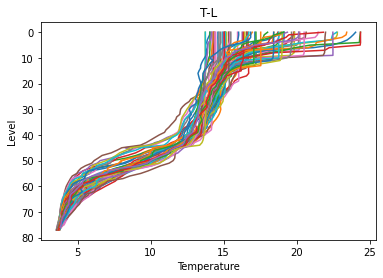

In [78]:
plt.plot(T, levels);
plt.gca().invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('Level')
plt.title('T-L')

Text(0.5, 1.0, 'P-L')

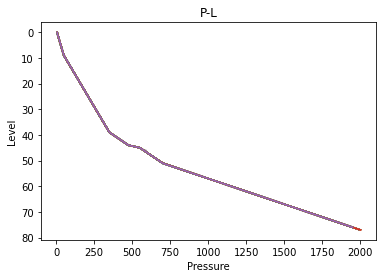

In [77]:
plt.plot(P, levels);
plt.gca().invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Level')
plt.title('P-L')

Text(0.5, 1.0, 'S-L')

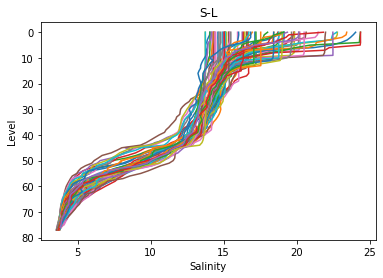

In [79]:
plt.plot(T, levels);
plt.gca().invert_yaxis()
plt.xlabel('Salinity')
plt.ylabel('Level')
plt.title('S-L')

### 2.7 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [75]:
T_mean = np.mean(T, axis=1)
S_mean = np.mean(S, axis=1)
P_mean = np.mean(P, axis=1)
print(T_mean)

[17.601726022485185 17.572236087587143 17.514583296246 17.423263947168987
 17.249438377275858 17.037301337882266 16.767876611997004
 16.446095884662785 16.17439195272085 16.045013556609284 15.6582702301644
 15.460729598999023 15.261148620296169 15.124891912614977
 14.991337827734045 14.901608080477327 14.819905435716784
 14.745351391869622 14.668229708800444 14.585026998777646
 14.497324337830415 14.419040525281751 14.354121633478114
 14.271027023727829 14.190810822151803 14.114878383842674 14.0434729344136
 13.980675658664188 13.909945951925742 13.83274319365218
 13.761391961896742 13.69836478619962 13.623351316194277
 13.541851314338478 13.46647294791969 13.39395945780986 13.325418910464725
 13.252054034052668 13.181310821223903 13.102337824331748
 12.892689163620407 12.677959429251182 12.464918896958634
 12.217851303719186 11.98270268053622 11.128108101922113
 10.804306659698486 10.497026672363281 10.17490659713745 9.834533335367839
 9.486253318786622 9.197933343251547 8.66010665893

In [74]:
T_std = np.std(T, axis=1)
S_std = np.std(S, axis=1)
P_std = np.std(P, axis=1)
print(T_std)

[2.9250089780535418 2.8640559124653913 2.833245628372158 2.751123527650163
 2.6024842197951767 2.426491647071412 2.2022058896742647
 1.9975254339474682 1.7910586224944238 1.7413279534513904
 1.266084647869944 1.0785759615786734 0.8976123589811774
 0.7974847879779939 0.6852532843945481 0.6394096045358345
 0.618356346077013 0.5938787675372312 0.5601073550569421
 0.5500910703858891 0.531837937916222 0.5263408933087826
 0.5266825867328461 0.5100918248254591 0.49376838253632593
 0.48980213645544324 0.48551873951513125 0.4851617065119204
 0.49244535942719553 0.5055733080857822 0.5088171764593392
 0.5048263306937405 0.5009328364630139 0.5141127091067528
 0.5096200188331722 0.5139994852019845 0.5254458371105407
 0.5318287306961399 0.5466500962620879 0.550609016551194
 0.5606621600851146 0.5793758767176571 0.5989958037227289
 0.6339286191667588 0.7064005710402687 0.8577526918401904
 0.8420422573693827 0.900319540876188 0.9466151481552937
 0.9902254964387505 1.01786434769987 1.0169077489357532 1

### 2.8 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 

Again, make sure you label the axes and put a title on each plot.

Text(0, 0.5, 'Level')

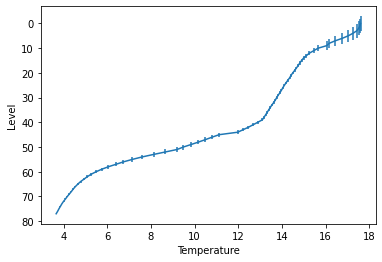

In [80]:
plt.errorbar(T_mean, levels, yerr=T_std);
plt.gca().invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('Level')

Text(0, 0.5, 'Level')

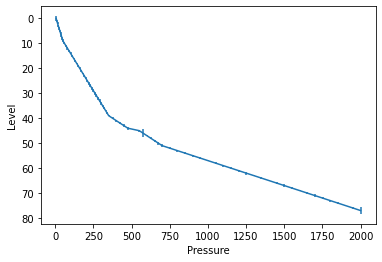

In [81]:
plt.errorbar(P_mean, levels, yerr=P_std);
plt.gca().invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Level')

Text(0, 0.5, 'Level')

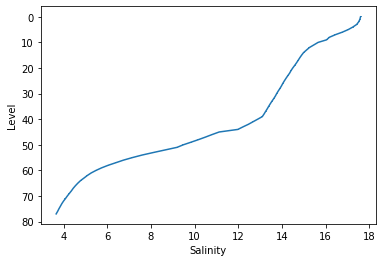

In [82]:
plt.errorbar(T_mean, levels, yerr=S_std);
plt.gca().invert_yaxis()
plt.xlabel('Salinity')
plt.ylabel('Level')

### 2.9 Create a scatter plot of the positions of the ARGO float data.  Color the positions by the date. Add a grid overlay. 
Don't forget to label the axes!

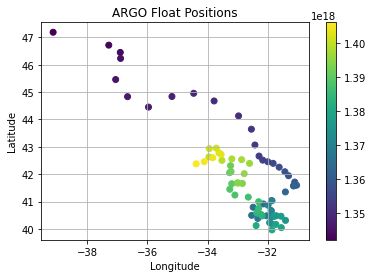

In [83]:
plt.scatter(lon, lat, c=date)
plt.grid()
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('ARGO Float Positions');